In [1]:
import math
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

%matplotlib inline

# Useful directory path.
root_dir = f'{os.getcwd()}/../results'
graphics_dir = f'{root_dir}/graphics'

# GP tools.
tools = ('DEAP', 'TensorGP (CPU)', 'TensorGP (GPU)', 'Operon')

# Function sets.
function_sets = {
    'nicolau_a': (4, 7, 255, 8),
    'nicolau_b': (6, 5, 63, 2),
    'nicolau_c': (9, 4, 31, 1)
}

# Numbers of fitness cases.
num_fitness_cases = (10, 100, 1000, 10000, 100000)

# Number of programs per size bin.
nppsb = 128

# Program dictionary.
with open(f'{root_dir}/programs/programs.pkl', 'rb') as f:
    program_dict = pickle.load(f) 

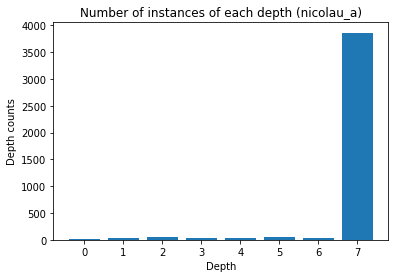

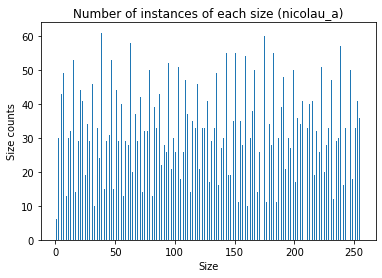

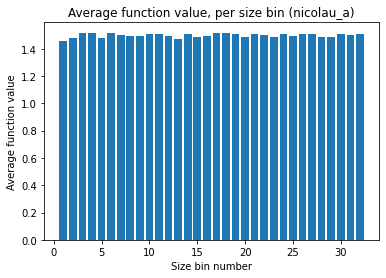

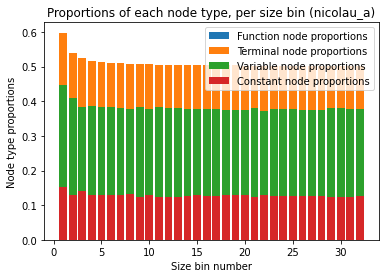

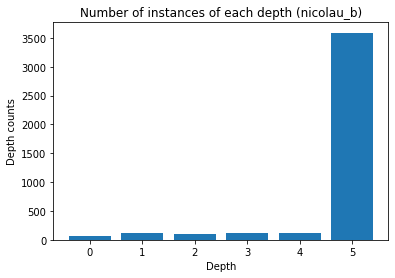

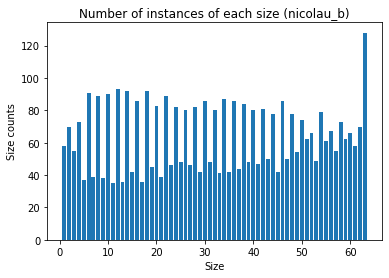

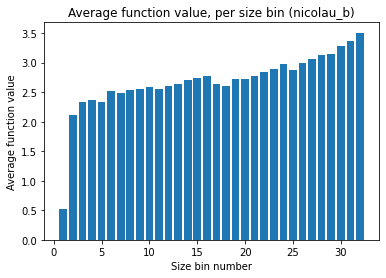

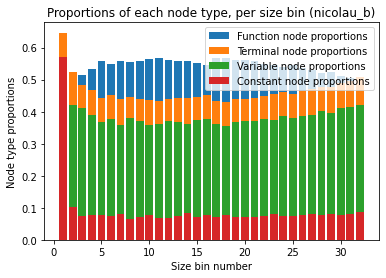

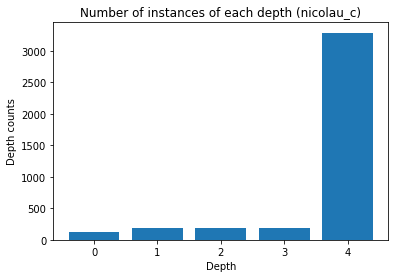

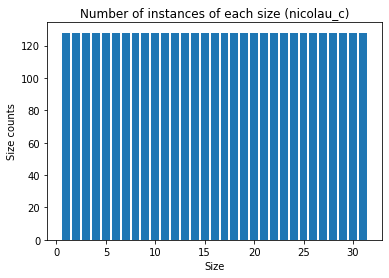

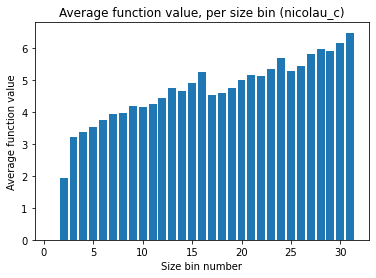

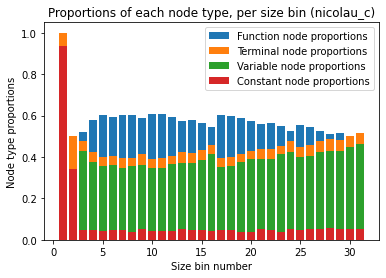

In [2]:
# Compute some statistics for the set of random programs
# generated for each function set.

# Total number of nodes for each size bin, for each function set.
num_nodes = []

for name, (num_functions, max_depth, max_size, bin_size) in (
    function_sets.items()):
    # For each function set...

    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # List where the `i`-th element, `0 <= i <= max_depth`, 
    # is to represent the number of instances for depth `i` 
    # over all random programs (i.e., from all size bins) 
    # for the function set with name `name`.
    depth_counts = [0]*(max_depth+1)

    # List where the `i`-th element, `0 <= i <= max_size-1`, 
    # is to represent the number of instances for size `i+1` 
    # over all random programs (i.e., from all size bins) 
    # for the function set with name `name`.
    size_counts = [0]*(max_size)

    # Lists where the `i`-th element contains the proportion
    # of the total number of nodes for size bin `i` that are 
    # functions/variables/constants/terminals.
    function_node_proportions = []
    variable_node_proportions = []
    constant_node_proportions = []
    terminal_node_proportions = []
    
    # List where the `i`-th element is to represent the 
    # "average function value" for size bin `i`, where 
    # this value is defined here to be the sum of the 
    # numbers of instances of each function type, with 
    # the `i`-th function type (specified by the `function_
    # counts` list) multiplied by `i`, all divided by the 
    # number of function types.
    #
    # In general, if the numbers of instances of function 
    # types are uniformly distributed for each size bin, 
    # the "average function value" as defined above should 
    # be equal to the number of function types minus one,
    # divided by 2. Thus, we can check for such uniformity
    # for each size bin by inspecting such an average value.
    average_function_values = []

    # Prepare for sizes related to the function set.
    num_nodes.append([])

    # Compute the relevant list elements.
    for (programs, depths, sizes, function_counts, 
        variable_counts, constant_counts) in (program_dict[name]
            [0:num_size_bins]):

        for depth in depths: depth_counts[depth] += 1
        for size in sizes: size_counts[size-1] += 1

        function_node_sum = sum(function_counts)
        variable_node_sum = sum(variable_counts)
        constant_node_sum = sum(constant_counts)
        terminal_node_sum = variable_node_sum + constant_node_sum
        node_sum = function_node_sum + terminal_node_sum

        function_node_proportions.append(function_node_sum/node_sum)
        variable_node_proportions.append(variable_node_sum/node_sum)
        constant_node_proportions.append(constant_node_sum/node_sum)
        terminal_node_proportions.append(terminal_node_sum/node_sum)
 
        average_function_value = (0) if (function_node_sum == 0) else (
            sum([i*function_counts[i] for i in range(
                num_functions)])/function_node_sum)

        average_function_values.append(average_function_value)

        # Add total number of nodes for the current size bin.
        num_nodes[-1].append(sum(sizes))

    # Compute/plot some relevant statistics for the number 
    # of instances of each possible program depth.

    # print('Program depths: ', depth_counts)
    # print('Mean of depth counts: ', np.mean(depth_counts))
    # print('Variance of depth counts: ', np.var(depth_counts))
    # print('Standard deviation of depth counts: ', np.std(depth_counts))
    # print(stats.chisquare(depth_counts))

    # Plot bar graph of depth counts.
    index = range(0, max_depth+1)
    plt.bar(index, depth_counts)
    plt.xlabel('Depth')
    plt.ylabel('Depth counts')
    plt.title('Number of instances of each depth ('+name+')')
    plt.savefig(f'{graphics_dir}/{name}/depths.svg')
    plt.show()


    # Compute/plot some relevant statistics for the number 
    # of instances of each possible program size.

    # print('Program sizes: ', size_counts)
    # print('Mean of size counts: ', np.mean(size_counts))
    # print('Variance of size counts: ', np.var(size_counts))
    # print('Standard deviation of size counts: ', np.std(size_counts))
    # print(stats.chisquare(size_counts))

    # Plot bar graph of size counts.
    index = range(1, max_size+1)
    plt.bar(index, size_counts)
    plt.xlabel('Size')
    plt.ylabel('Size counts')
    plt.title('Number of instances of each size ('+name+')')
    plt.savefig(f'{graphics_dir}/{name}/sizes.svg')
    plt.show()


    # Compute/plot some relevant statistics for the average
    # function values.

    # print('Average function values: ', average_function_values)
    # print('Mean of average function values: ', 
    #     np.mean(average_function_values))
    # print('Variance of average function values: ', 
    #     np.var(average_function_values))
    # print('Standard deviation of average function values: ', 
    #     np.std(average_function_values))
    # print(stats.chisquare(average_function_values))

    # Plot bar graph of average function values.
    index = range(1, num_size_bins+1)

    #log_approx = [4*(1/log(max_size,2))*log(max_size/x,2) + 
    #    10.5*(1/log(max_size,2))*log(x, 2) for x in index]

    #plt.plot(index, log_approx)
    plt.bar(index, average_function_values)

    plt.xlabel('Size bin number')
    plt.ylabel('Average function value')
    plt.title('Average function value, per size bin ('+name+')')
    plt.savefig(f'{graphics_dir}/{name}/average_function_values.svg')
    plt.show()


    # Compute/plot some relevant statistics for proportions
    # of the total number of nodes with particular node types.

    # print('Function node proportions: ', function_node_proportions)
    # print('Terminal node proportions: ', terminal_node_proportions)
    # print('Variable node proportions: ', variable_node_proportions)
    # print('Constant node proportions: ', constant_node_proportions)


    # Plot bar graph of function counts.
    index = range(1, num_size_bins+1)
    plt.bar(index, function_node_proportions, 
        label='Function node proportions')
    plt.bar(index, terminal_node_proportions, 
        label='Terminal node proportions')
    plt.bar(index, variable_node_proportions, 
        label='Variable node proportions')
    plt.bar(index, constant_node_proportions, 
        label='Constant node proportions')
    plt.xlabel('Size bin number')
    plt.ylabel('Node type proportions')
    plt.title('Proportions of each node type, per size bin ('+name+')')
    plt.legend(loc='upper right')
    plt.savefig(f'{graphics_dir}/{name}/node_proportions.svg')
    plt.show()

In [16]:
# Average of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
avg_med_avg_runtimes = []

# Median of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
med_med_avg_runtimes = []

# Minimum of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
min_med_avg_runtimes = []

# Maximum of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
max_med_avg_runtimes = []

# Standard deviation of *median average runtimes* for each size 
# bin, for each number of fitness cases, for each function set,
# for each tool.
std_dev_med_avg_runtimes = []

# Interquartile range of *median average runtimes* for each size 
# bin, for each number of fitness cases, for each function set,
# for each tool.
iqr_med_avg_runtimes = []

# Median node evaluations per second (NEPS) from *median average
# runtimes* for each size bin, for each number of fitness cases, 
# for each function set, for each tool.
med_neps = []

# Median of median node evaluations per second (NEPS) for each 
# size bin, for each number of fitness cases, for each function 
# set, for each tool.
med_med_neps = []

# Interquartile range of median node evaluations per second (NEPS) 
# for each size bin, for each number of fitness cases, for each 
# function set, for each tool.
iqr_med_neps = []

In [17]:
####################################################################

# Compute statistics for DEAP.

with open(f'{root_dir}/results_deap.pkl', 'rb') as f:
    _, med_avg_runtimes = pickle.load(f)

# Prepare for statistics related to the tool.
avg_med_avg_runtimes.append([])
med_med_avg_runtimes.append([])
min_med_avg_runtimes.append([])
max_med_avg_runtimes.append([])
std_dev_med_avg_runtimes.append([])
iqr_med_avg_runtimes.append([])
med_neps.append([])
med_med_neps.append([])
iqr_med_neps.append([])

for i, (name, (num_functions, max_depth, max_size, bin_size)) in enumerate(
    function_sets.items()):
    # For each function set...
    print(f'For function set `{name}`...')

    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Prepare for statistics related to the function set.
    avg_med_avg_runtimes[-1].append([])
    med_med_avg_runtimes[-1].append([])
    min_med_avg_runtimes[-1].append([])
    max_med_avg_runtimes[-1].append([])
    std_dev_med_avg_runtimes[-1].append([])
    iqr_med_avg_runtimes[-1].append([])
    med_neps[-1].append([])
    med_med_neps[-1].append([])
    iqr_med_neps[-1].append([])

    for j, nfc in enumerate(num_fitness_cases):
        # For each number of fitness cases...
        print(f'For number of fitness cases `{nfc}`...')

        # Average of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        avg_med_avg_runtimes[-1][-1].append(
            [np.mean(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Averages of median average runtimes:', 
            avg_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Median of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        med_med_avg_runtimes[-1][-1].append(
            [np.median(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Medians of median average runtimes:', 
            med_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Minimum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        min_med_avg_runtimes[-1][-1].append(
            [min(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Minimums of median average runtimes:', 
            min_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Maximum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        max_med_avg_runtimes[-1][-1].append(
            [max(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Maximums of median average runtimes:', 
            max_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Standard deviation of *median average runtimes* for each 
        # size bin, relevant to the number of fitness cases.
        std_dev_med_avg_runtimes[-1][-1].append(
            [np.std(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Standard deviations of median average runtimes:', 
            std_dev_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Interquartile range of *median average runtimes* for each 
        # size bin, relevant to the number of fitness cases.
        iqr_med_avg_runtimes[-1][-1].append(
            [stats.iqr(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Interquartile range of median average runtimes:', 
            iqr_med_avg_runtimes[-1][-1][-1])
        print('\n\n')

        print('Number of nodes per size bin:', num_nodes[i])

        # Number of node evaluations per size bin.
        num_evals = [(n * nfc) for n in num_nodes[i]]

        print('Number of node evaluations per size bin:', num_evals)

        # Median node evaluations per second (NEPS) from *median 
        # average runtimes*, for each size bin, relevant to the 
        # number of fitness cases.
        med_neps[-1][-1].append([[num_evals_ / med_avg_runtime
            for med_avg_runtime in med_avg_runtimes[i][j][k]]
            for k, num_evals_ in enumerate(num_evals)])
        print('Median node evaluations per second:', med_neps[-1][-1][-1])
        print('\n')

        # Median node evaluations per second (NEPS) of *median 
        # average runtimes*, for each size bin, relevant to the 
        # number of fitness cases.
        med_med_neps[-1][-1].append([np.median(med_neps_)
            for med_neps_ in med_neps[-1][-1][-1]])
        print('Median of median node evaluations per second:', 
            med_med_neps[-1][-1][-1])
        print('\n')

        # Interquartile range of median node evaluations per second 
        # (NEPS), for each size bin, relevant to the number of fitness 
        # cases.
        iqr_med_neps[-1][-1].append([stats.iqr(med_neps_)
            for med_neps_ in med_neps[-1][-1][-1]])
        print('Interquartile range of median node evaluations per second:', 
            iqr_med_neps[-1][-1][-1])
        print('\n')

        # Minimum median NEPS value.
        print('Minimum median NEPS value', min(med_med_neps[-1][-1][-1]))

        # Maximum median NEPS value.
        print('Maximum median NEPS value', max(med_med_neps[-1][-1][-1]))

For function set `nicolau_a`...
For number of fitness cases `10`...
Averages of median average runtimes: [0.0631546703333375, 0.06571601266666723, 0.0680789078333343, 0.07162447749999974, 0.0764276336666659, 0.07760379999999618, 0.08088181783333681, 0.08645653483333386, 0.08850631933333375, 0.0924954350000012, 0.09584639816666633, 0.09853159050000215, 0.10308478916667003, 0.10685437400000097, 0.11122059733333363, 0.11219288066666404, 0.11741878416666651, 0.1196277979999986, 0.12564417500000027, 0.129626759333334, 0.12956956883333248, 0.1351470843333331, 0.13870566066666376, 0.13993085516666307, 0.14548316699999475, 0.14811307783333424, 0.15086488583333355, 0.15729761166666853, 0.15817434699999922, 0.16597920149999842, 0.16630848133333606, 0.1757401386666686]


Medians of median average runtimes: [0.06315074750000349, 0.06541417599999733, 0.06787787500000064, 0.07159903299999826, 0.07680511649999744, 0.07760490099999373, 0.08090270950000189, 0.08666075300000387, 0.08843941599999994, 0.0

In [18]:
####################################################################

# Compute statistics for TensorGP.

with open(f'{root_dir}/results_tensorgp.pkl', 'rb') as f:
    med_avg_runtimes = pickle.load(f)

for i, device in enumerate(('CPU', 'GPU')):
    # For each device...
    print(f'For device `{device}`...')

    # Prepare for statistics related to the tool.
    avg_med_avg_runtimes.append([])
    med_med_avg_runtimes.append([])
    min_med_avg_runtimes.append([])
    max_med_avg_runtimes.append([])
    std_dev_med_avg_runtimes.append([])
    iqr_med_avg_runtimes.append([])
    med_neps.append([])
    med_med_neps.append([])
    iqr_med_neps.append([])

    for j, (name, (num_functions, max_depth, max_size, bin_size)) in enumerate(
        function_sets.items()):
        # For each function set...
        print(f'For function set `{name}`...')

        # Number of "size bins."
        num_size_bins = int(math.ceil(max_size/bin_size))

        # Prepare for statistics related to the function set.
        avg_med_avg_runtimes[-1].append([])
        med_med_avg_runtimes[-1].append([])
        min_med_avg_runtimes[-1].append([])
        max_med_avg_runtimes[-1].append([])
        std_dev_med_avg_runtimes[-1].append([])
        iqr_med_avg_runtimes[-1].append([])
        med_neps[-1].append([])
        med_med_neps[-1].append([])
        iqr_med_neps[-1].append([])

        for k, nfc in enumerate(num_fitness_cases):
            # For each number of fitness cases...
            print(f'For number of fitness cases `{nfc}`...')


            # Average of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            avg_med_avg_runtimes[-1][-1].append(
                [np.mean(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Averages of median average runtimes:', 
                avg_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Median of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            med_med_avg_runtimes[-1][-1].append(
                [np.median(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Medians of median average runtimes:', 
                med_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Minimum of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            min_med_avg_runtimes[-1][-1].append(
                [min(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Minimums of median average runtimes:', 
                min_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Maximum of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            max_med_avg_runtimes[-1][-1].append(
                [max(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Maximums of median average runtimes:', 
                max_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Standard deviation of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            std_dev_med_avg_runtimes[-1][-1].append(
                [np.std(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Standard deviations of median average runtimes:', 
                std_dev_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Interquartile range of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            iqr_med_avg_runtimes[-1][-1].append(
                [stats.iqr(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Interquartile range of median average runtimes:', 
                iqr_med_avg_runtimes[-1][-1][-1])
            print('\n\n')

            print('Number of nodes per size bin:', num_nodes[j])

            # Number of node evaluations per size bin.
            num_evals = [(n * nfc) for n in num_nodes[j]]

            print('Number of node evaluations per size bin:', num_evals)

            # Median node evaluations per second (NEPS) from *median 
            # average runtimes*, for each size bin, relevant to the 
            # number of fitness cases.
            med_neps[-1][-1].append([[num_evals_ / med_avg_runtime
                for med_avg_runtime in med_avg_runtimes[i][j][k][m]]
                for m, num_evals_ in enumerate(num_evals)])
            print('Median node evaluations per second:', 
                med_neps[-1][-1][-1])
            print('\n')

            # Median node evaluations per second (NEPS) of *median 
            # average runtimes*, for each size bin, relevant to the 
            # number of fitness cases.
            med_med_neps[-1][-1].append([np.median(med_neps_) 
                for med_neps_ in med_neps[-1][-1][-1]])
            print('Median of median node evaluations per second:', 
                med_med_neps[-1][-1][-1])
            print('\n')

            # Interquartile range of median node evaluations per 
            # second (NEPS), for each size bin, relevant to the number 
            # of fitness cases.
            iqr_med_neps[-1][-1].append([stats.iqr(med_neps_) 
                for med_neps_ in med_neps[-1][-1][-1]])
            print('Interquartile range of median node evaluations per second:', 
                iqr_med_neps[-1][-1][-1])
            print('\n')

For device `CPU`...
For function set `nicolau_a`...
For number of fitness cases `10`...
Averages of median average runtimes: [0.03986515899996448, 0.05415272749996802, 0.06793763220011897, 0.07971011720001116, 0.09477006190008978, 0.10666009270025825, 0.11983051489987702, 0.13360348059977695, 0.14130464310001117, 0.16128105680036242, 0.1721550815998853, 0.1835166594997645, 0.19648762619999616, 0.21606837960007397, 0.22394193849995644, 0.2381543088997205, 0.25446398480016796, 0.2762166327000159, 0.2873932043003151, 0.2957603888000449, 0.3017918203999216, 0.31917937279977193, 0.3379817271999855, 0.34316407869973775, 0.35513610580001115, 0.37425395230020514, 0.3864962193998508, 0.39505773139990197, 0.4062639617999594, 0.421515827300027, 0.4318044071998884, 0.4504607090000718]


Medians of median average runtimes: [0.03953706399988732, 0.054349604500202986, 0.0676360540001042, 0.07962132950069645, 0.09495390600022802, 0.10596818750036618, 0.11963361549987894, 0.13328284749968589, 0.1413114

In [19]:
####################################################################

# Compute statistics for Operon.

# Read in the median average runtime results from some 
# CSV files, and convert into another useful format.
med_avg_runtimes = []

for name, (num_functions, max_depth, 
        max_size, bin_size) in function_sets.items():
    
    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Prepare for statistics relevant to the function set.
    med_avg_runtimes.append([])

    with open(f'{root_dir}/results_operon_{name}.csv', 'r') as f:
        for nfc in num_fitness_cases:
            # Prepare for statistics relevant to the number
            # of fitness cases.
            med_avg_runtimes[-1].append([[] for _ in range(num_size_bins)])

            for i in range(1, num_size_bins + 1):
                # Number of decimal digits needed to represent `i`.
                d = int(math.ceil(math.log(i + 1, 10)))

                # String representing median average runtimes
                # for bin `i`, in terms of microseconds.
                runtimes_str = ''.join(f.readline().split())[(5+d):]

                # Median average runtimes for bin `i`, in terms
                # of seconds.
                runtimes = [float(t)/(10**6) for t in runtimes_str.split(',')]

                med_avg_runtimes[-1][-1][i-1] = runtimes

# Prepare for statistics related to the tool.
avg_med_avg_runtimes.append([])
med_med_avg_runtimes.append([])
min_med_avg_runtimes.append([])
max_med_avg_runtimes.append([])
std_dev_med_avg_runtimes.append([])
iqr_med_avg_runtimes.append([])
med_neps.append([])
med_med_neps.append([])
iqr_med_neps.append([])

for i, (name, (num_functions, max_depth, max_size, bin_size)) in enumerate(
    function_sets.items()):
    # For each function set...
    print(f'For function set `{name}`...')

    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Prepare for statistics related to the function set.
    avg_med_avg_runtimes[-1].append([])
    med_med_avg_runtimes[-1].append([])
    min_med_avg_runtimes[-1].append([])
    max_med_avg_runtimes[-1].append([])
    std_dev_med_avg_runtimes[-1].append([])
    iqr_med_avg_runtimes[-1].append([])
    med_neps[-1].append([])
    med_med_neps[-1].append([])
    iqr_med_neps[-1].append([])

    for j, nfc in enumerate(num_fitness_cases):
        # For each number of fitness cases...
        print(f'For number of fitness cases `{nfc}`...')

        # Average of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        avg_med_avg_runtimes[-1][-1].append(
            [np.mean(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Averages of median average runtimes:', 
            avg_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Median of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        med_med_avg_runtimes[-1][-1].append(
            [np.median(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Medians of median average runtimes:', 
            med_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Minimum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        min_med_avg_runtimes[-1][-1].append(
            [min(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Minimums of median average runtimes:', 
            min_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Maximum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        max_med_avg_runtimes[-1][-1].append(
            [max(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Maximums of median average runtimes:', 
            max_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Standard deviation of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        std_dev_med_avg_runtimes[-1][-1].append(
            [np.std(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Standard deviations of median average runtimes:', 
            std_dev_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Interquartile range of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        iqr_med_avg_runtimes[-1][-1].append(
            [stats.iqr(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Interquartile range of median average runtimes:', 
            iqr_med_avg_runtimes[-1][-1][-1])
        print('\n\n')

        print('Number of nodes per size bin:', num_nodes[i])

        # Number of node evaluations per size bin.
        num_evals = [(n * nfc) for n in num_nodes[i]]

        print('Number of node evaluations per size bin:', num_evals)

        # Median node evaluations per second (NEPS) from *median 
        # average runtimes*, for each size bin, relevant to the 
        # number of fitness cases.
        med_neps[-1][-1].append([[num_evals_ / med_avg_runtime
            for med_avg_runtime in med_avg_runtimes[i][j][k]]
            for k, num_evals_ in enumerate(num_evals)])
        print('Median node evaluations per second:', med_neps[-1][-1][-1])
        print('\n')

        # Median node evaluations per second (NEPS) of *median 
        # average runtimes*, for each size bin, relevant to the 
        # number of fitness cases.
        med_med_neps[-1][-1].append([np.median(med_neps_)
            for med_neps_ in med_neps[-1][-1][-1]])
        print('Median of median node evaluations per second:', 
            med_med_neps[-1][-1][-1])
        print('\n')

        # Interquartile range of median node evaluations per second 
        # (NEPS), for each size bin, relevant to the number of fitness 
        # cases.
        iqr_med_neps[-1][-1].append([stats.iqr(med_neps_)
            for med_neps_ in med_neps[-1][-1][-1]])
        print('Interquartile range of median node evaluations per second:', 
            iqr_med_neps[-1][-1][-1])
        print('\n')

        # Minimum median NEPS value.
        print('Minimum median NEPS value', min(med_med_neps[-1][-1][-1]))

        # Maximum median NEPS value.
        print('Maximum median NEPS value', max(med_med_neps[-1][-1][-1]))

For function set `nicolau_a`...
For number of fitness cases `10`...
Averages of median average runtimes: [2.4671352599999997e-05, 2.64144814e-05, 2.8683044800000003e-05, 3.14854548e-05, 3.391583500000001e-05, 3.5907109e-05, 3.7624746e-05, 3.95353986e-05, 4.27669424e-05, 3.76102984e-05, 4.99653782e-05, 4.8432712799999994e-05, 5.02924014e-05, 5.2285321799999996e-05, 5.4122924799999995e-05, 5.59849532e-05, 5.8137825599999996e-05, 6.00628746e-05, 6.248647859999999e-05, 6.42656468e-05, 6.66914216e-05, 6.8640654e-05, 7.0381173e-05, 7.289429500000001e-05, 7.519998739999999e-05, 7.76253974e-05, 8.00378088e-05, 8.23247898e-05, 8.51678738e-05, 8.7226907e-05, 8.99083122e-05, 9.31185302e-05]


Medians of median average runtimes: [2.4604079e-05, 2.6412793e-05, 2.8680548000000002e-05, 3.147881e-05, 3.3915456e-05, 3.5894281e-05, 3.7620057000000005e-05, 3.9558423e-05, 4.2792585e-05, 4.4726386e-05, 4.9004249e-05, 4.8461328e-05, 5.0231703000000004e-05, 5.2262061e-05, 5.4152711e-05, 5.592935e-05, 5.81923

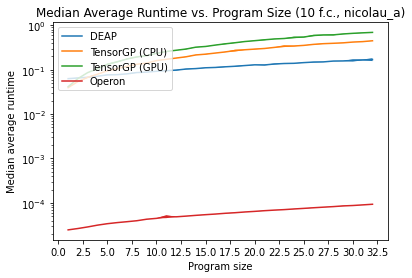

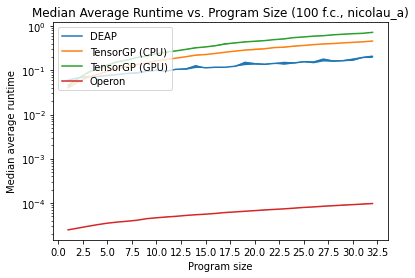

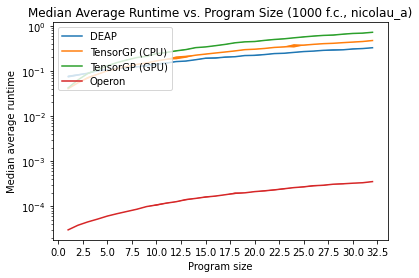

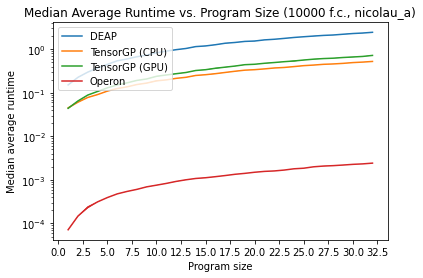

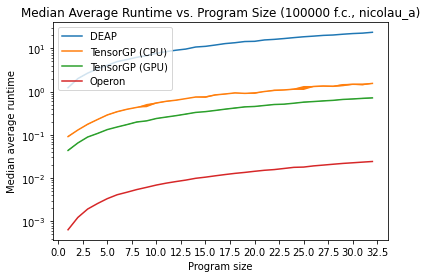

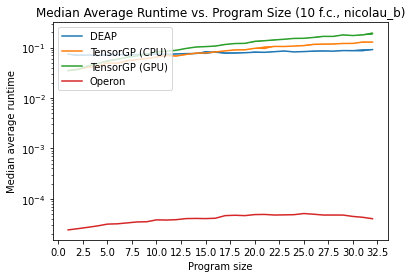

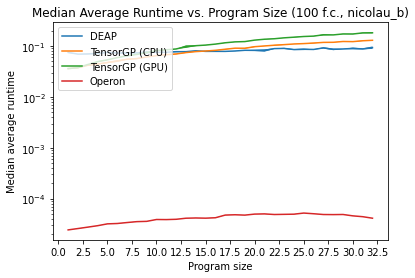

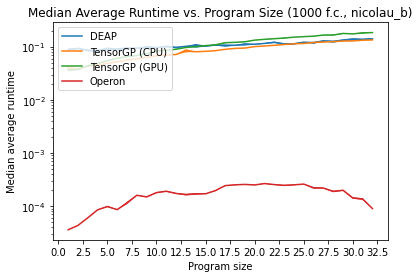

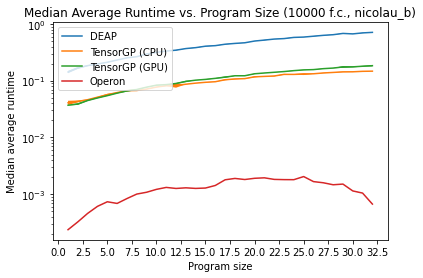

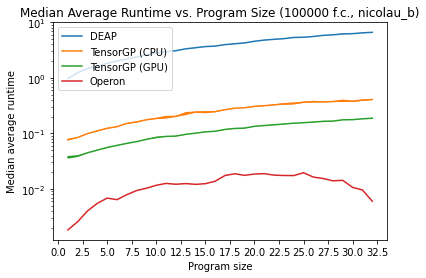

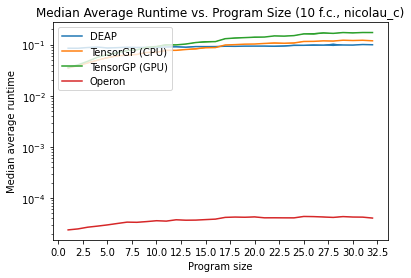

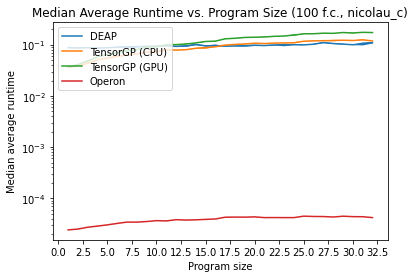

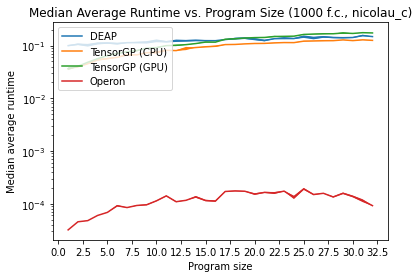

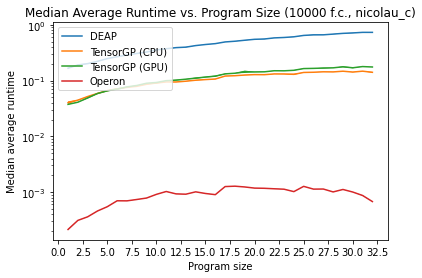

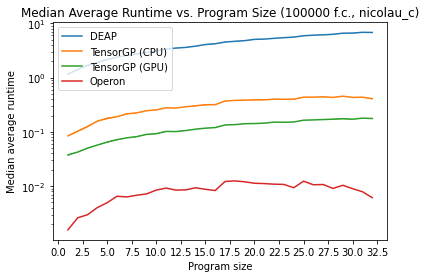

In [20]:
# Plot graph of median average runtimes for each tool, 
# for each number of fitness cases, for each function set.
for i, (name, (_, _, max_size, bin_size)) in enumerate(
    function_sets.items()):

    # Number of size bins.
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Index range for plot.
    index = range(1, num_size_bins+1)

    for j, nfc in enumerate(num_fitness_cases):
        for t, tool in enumerate(tools):
            x = index
            y = med_med_avg_runtimes[t][i][j]
            iqr = iqr_med_avg_runtimes[t][i][j]
            lower_bound = [y_ - iqr_ for y_, iqr_ in zip(y, iqr)]
            upper_bound = [y_ + iqr_ for y_, iqr_ in zip(y, iqr)]
            plt.plot(x, y, label=f'{tool}')
            plt.fill_between(x, lower_bound, upper_bound)
        plt.xlabel('Program size')
        # plt.xticks(index, [str(size) for size in program_sizes[i]])
        plt.locator_params(axis='x', nbins=15)
        plt.ylabel('Median average runtime')
        plt.yscale('log')
        plt.title(
            f'Median Average Runtime vs. Program Size ({nfc} f.c., {name})')
        plt.legend(loc='upper left')
        plt.savefig(f'{graphics_dir}/{name}/median_avg_runtime_{nfc}.svg')
        plt.show()

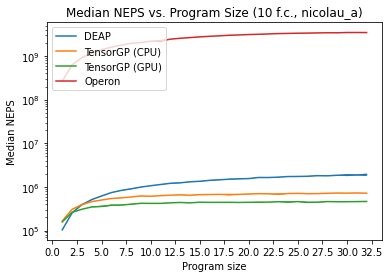

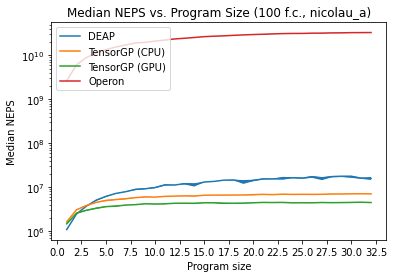

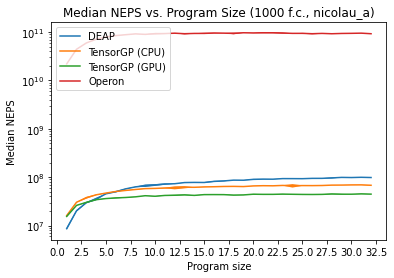

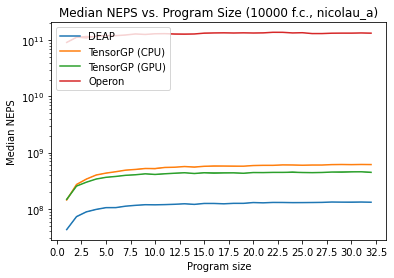

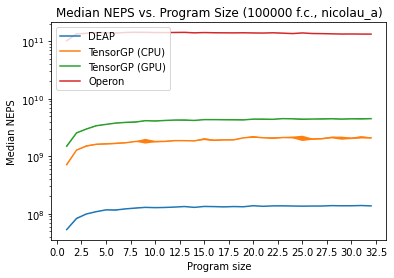

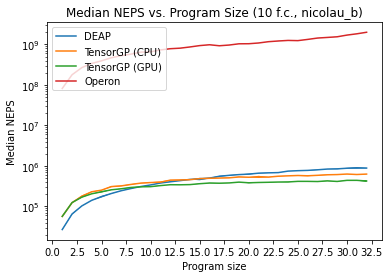

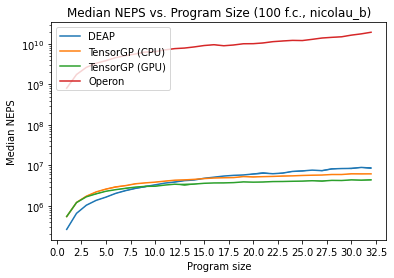

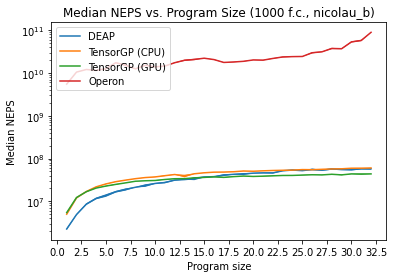

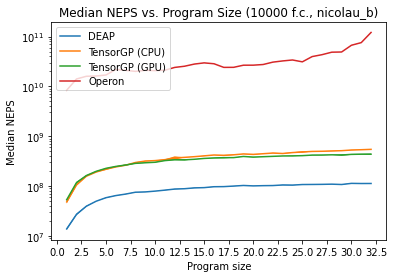

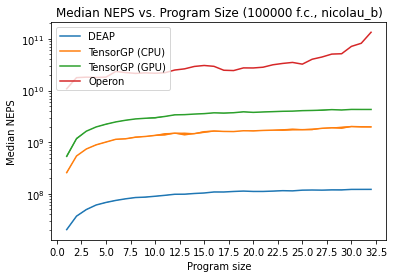

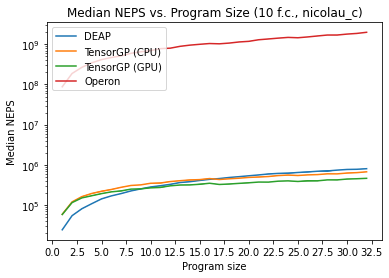

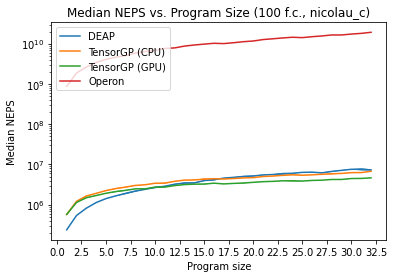

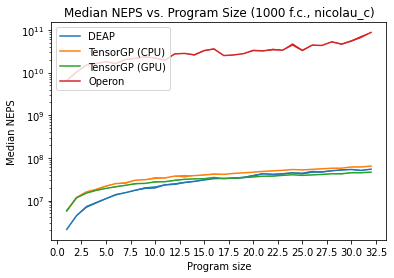

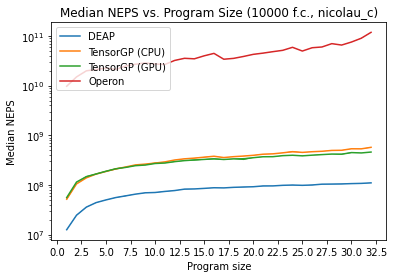

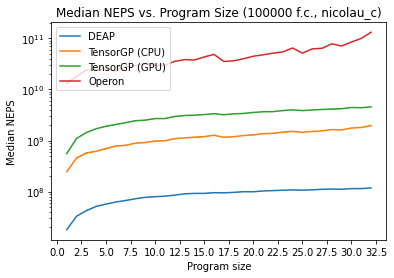

In [21]:
# Plot graph of median node evaluations per second for each tool, 
# for each number of fitness cases, for each function set.
for i, (name, (_, _, max_size, bin_size)) in enumerate(
    function_sets.items()):

    # Number of size bins.
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Index range for plot.
    index = range(1, num_size_bins+1)

    for j, nfc in enumerate(num_fitness_cases):
        for t, tool in enumerate(tools):
            x = index
            y = med_med_neps[t][i][j]
            iqr = iqr_med_neps[t][i][j]
            lower_bound = [y_ - iqr_ for y_, iqr_ in zip(y, iqr)]
            upper_bound = [y_ + iqr_ for y_, iqr_ in zip(y, iqr)]
            plt.plot(x, y, label=f'{tool}')
            plt.fill_between(x, lower_bound, upper_bound)
        plt.xlabel('Program size')
        # plt.xticks(index, [str(size) for size in program_sizes[i]])
        plt.locator_params(axis='x', nbins=15)
        plt.ylabel('Median NEPS')
        plt.yscale('log')
        plt.title(f'Median NEPS vs. Program Size ({nfc} f.c., {name})')
        plt.legend(loc='upper left')
        plt.savefig(f'{graphics_dir}/{name}/median_neps_{nfc}.svg')
        plt.show()